In [6]:
!pip install pyspark
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 9.14 s (started: 2023-06-17 20:51:54 +00:00)


In [7]:
from pyspark.sql import SparkSession

time: 518 µs (started: 2023-06-17 20:52:03 +00:00)


In [8]:
spark = SparkSession.builder.appName('test').getOrCreate()


time: 8.76 ms (started: 2023-06-17 20:52:03 +00:00)


In [9]:
spark

time: 4.88 ms (started: 2023-06-17 20:52:03 +00:00)


In [10]:
from pyspark.sql.functions import to_timestamp,col,lit,coalesce,concat,unix_timestamp
from pyspark.sql.types import StructType,StructField, IntegerType, FloatType, StringType, DateType,TimestampType,DoubleType
Myschema = StructType([
StructField('Station', StringType(),True),
StructField('Date/Time', TimestampType(),True),
StructField('Air Dew Point', IntegerType(),True),
StructField('Air Temperature (OC)', IntegerType(),True),
StructField('Humidity %', IntegerType(),True),
StructField('Manual Present Weather', StringType(),True),
StructField('Cloud Type', StringType(),True),
StructField('Clouds Cover (Okta)', IntegerType(),True),
StructField('Cloud Cover %', StringType(),True),
StructField('Wind Direction (Degrees)', IntegerType(),True),
StructField('Wind Speed (MPS)', IntegerType(),True),
StructField('Wind Type', StringType(),True)])
df = spark.read.csv("/content/irbid  01-01 -2017 ---  31-01-2023.csv",header=True,schema=Myschema)

time: 3.09 s (started: 2023-06-17 20:52:03 +00:00)


In [11]:
df.show()

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  null|   cumulus|                  2|           25|                    null|               0|     calm|
|  Irbid|2017-01-01 09:00:00|            7|                   8|        91|                  null|   cumulus|                  2|           25|                     300|               3|   normal|
|  Irbid|2017-01-01 

In [12]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = true)
 |-- Cloud Type: string (nullable = true)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: string (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = true)

time: 7.19 ms (started: 2023-06-17 20:52:10 +00:00)


In [13]:
df.count()

8043

time: 1.16 s (started: 2023-06-17 20:52:10 +00:00)


In [14]:
df.dropDuplicates(['Air Dew Point']).count()

42

time: 1.94 s (started: 2023-06-17 20:52:11 +00:00)


In [15]:
df.dropDuplicates(['Air Dew Point'])

DataFrame[Station: string, Date/Time: timestamp, Air Dew Point: int, Air Temperature (OC): int, Humidity %: int, Manual Present Weather: string, Cloud Type: string, Clouds Cover (Okta): int, Cloud Cover %: string, Wind Direction (Degrees): int, Wind Speed (MPS): int, Wind Type: string]

time: 96.4 ms (started: 2023-06-17 20:52:13 +00:00)


In [16]:
df.count()

8043

time: 721 ms (started: 2023-06-17 20:52:13 +00:00)


In [17]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 7067,
 'Air Temperature (OC)': 14,
 'Humidity %': 7067,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 7644,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 2321,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 8.17 s (started: 2023-06-17 20:52:14 +00:00)


In [18]:
import pyspark.sql.functions as F
df.select('Air Dew Point').withColumn('isNull_c',F.col('Air Dew Point').isNull()).where('isNull_c = True').count()

7067

time: 877 ms (started: 2023-06-17 20:52:22 +00:00)


In [19]:
for x in df.columns:
  df.groupBy(x).count().show()

+-------+-----+
|Station|count|
+-------+-----+
|  Irbid| 8043|
+-------+-----+

+-------------------+-----+
|          Date/Time|count|
+-------------------+-----+
|2017-10-19 03:00:00|    1|
|2017-02-23 18:00:00|    1|
|2017-05-06 15:00:00|    1|
|2017-06-15 06:00:00|    1|
|2017-07-07 18:00:00|    1|
|2018-06-02 06:00:00|    1|
|2018-10-14 12:00:00|    1|
|2019-01-17 18:00:00|    1|
|2019-02-01 18:00:00|    1|
|2019-06-18 00:00:00|    1|
|2019-12-12 06:00:00|    1|
|2020-01-21 12:00:00|    1|
|2020-07-13 00:00:00|    1|
|2021-03-11 18:00:00|    1|
|2021-04-02 18:00:00|    1|
|2021-04-27 15:00:00|    1|
|2021-05-21 18:00:00|    1|
|2021-07-12 12:00:00|    1|
|2021-07-18 15:00:00|    1|
|2021-07-20 00:00:00|    1|
+-------------------+-----+
only showing top 20 rows

+-------------+-----+
|Air Dew Point|count|
+-------------+-----+
|          -13|    2|
|          -20|    1|
|           -1|   14|
|          -10|    2|
|          -11|    3|
|           12|   54|
|           22|    6|
|

In [20]:
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import skewness
df.agg(skewness('Humidity %')).show()
imptr = Imputer(inputCols=['Humidity %'],outputCols=['Humidity %']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+--------------------+
|skewness(Humidity %)|
+--------------------+
| 0.45744019132746716|
+--------------------+

time: 2.94 s (started: 2023-06-17 20:52:33 +00:00)


In [21]:
df.select('Humidity %').withColumn('isNull_c',F.col('Humidity %').isNull()).where('isNull_c = True').count()

0

time: 759 ms (started: 2023-06-17 20:52:36 +00:00)


In [22]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 7067,
 'Air Temperature (OC)': 14,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 7644,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 2321,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 7.06 s (started: 2023-06-17 20:52:36 +00:00)


In [23]:
df.agg(skewness('Air Temperature (OC)')).show()
imptr = Imputer(inputCols=['Air Temperature (OC)'],outputCols=['Air Temperature (OC)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+------------------------------+
|skewness(Air Temperature (OC))|
+------------------------------+
|           0.11399972071642832|
+------------------------------+

time: 1.12 s (started: 2023-06-17 20:52:43 +00:00)


In [24]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 7067,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 7644,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 2321,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 2.74 s (started: 2023-06-17 20:52:45 +00:00)


In [25]:
df.agg(skewness('Air Temperature (OC)')).show()
imptr = Imputer(inputCols=['Air Dew Point'],outputCols=['Air Dew Point']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+------------------------------+
|skewness(Air Temperature (OC))|
+------------------------------+
|           0.11404267837333178|
+------------------------------+

time: 729 ms (started: 2023-06-17 20:52:47 +00:00)


In [26]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 7644,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 2321,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 2.43 s (started: 2023-06-17 20:52:48 +00:00)


In [27]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = true)
 |-- Cloud Type: string (nullable = true)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: string (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = true)

time: 8.84 ms (started: 2023-06-17 20:52:51 +00:00)


In [28]:
df.agg(skewness('Wind Speed (MPS)')).show()
imptr = Imputer(inputCols=['Wind Speed (MPS)'],outputCols=['Wind Speed (MPS)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+--------------------------+
|skewness(Wind Speed (MPS))|
+--------------------------+
|        1.0896782519030341|
+--------------------------+

time: 589 ms (started: 2023-06-17 20:52:51 +00:00)


In [29]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 7644,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 2321,
 'Wind Speed (MPS)': 0,
 'Wind Type': 1}

time: 2.63 s (started: 2023-06-17 20:52:51 +00:00)


In [30]:
df.agg(skewness('Wind Direction (Degrees)')).show()
imptr = Imputer(inputCols=['Wind Direction (Degrees)'],outputCols=['Wind Direction (Degrees)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+----------------------------------+
|skewness(Wind Direction (Degrees))|
+----------------------------------+
|               -0.9225780131180557|
+----------------------------------+

time: 1.15 s (started: 2023-06-17 20:52:54 +00:00)


In [31]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 7644,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 1}

time: 2.73 s (started: 2023-06-17 20:52:55 +00:00)


In [32]:
df.agg(skewness('Clouds Cover (Okta)')).show()
imptr = Imputer(inputCols=['Clouds Cover (Okta)'],outputCols=['Clouds Cover (Okta)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+-----------------------------+
|skewness(Clouds Cover (Okta))|
+-----------------------------+
|           0.5703969184572154|
+-----------------------------+

time: 461 ms (started: 2023-06-17 20:52:58 +00:00)


In [33]:
df.agg(F.mode("Wind Type")).collect()

[Row(mode(Wind Type)='normal')]

time: 322 ms (started: 2023-06-17 20:52:58 +00:00)


In [34]:
df = df.fillna('normal','Wind Type')
df.show(5)

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  null|   cumulus|                  2|           25|                     260|               0|     calm|
|  Irbid|2017-01-01 09:00:00|            7|                   8|        91|                  null|   cumulus|                  2|           25|                     300|               3|   normal|
|  Irbid|2017-01-01 

In [35]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 7641,
 'Clouds Cover (Okta)': 0,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 0}

time: 2.14 s (started: 2023-06-17 20:52:59 +00:00)


In [36]:
df.agg(F.mode("Cloud Type")).collect()
df = df.fillna('cumulus','Cloud Type')
df.show(5)

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  null|   cumulus|                  2|           25|                     260|               0|     calm|
|  Irbid|2017-01-01 09:00:00|            7|                   8|        91|                  null|   cumulus|                  2|           25|                     300|               3|   normal|
|  Irbid|2017-01-01 

In [37]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 8001,
 'Cloud Type': 0,
 'Clouds Cover (Okta)': 0,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 0}

time: 2.02 s (started: 2023-06-17 20:53:01 +00:00)


In [38]:
df.agg(F.mode("Manual Present Weather")).collect()
df = df.fillna('Haze','Manual Present Weather')
df.show(5)

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  Haze|   cumulus|                  2|           25|                     260|               0|     calm|
|  Irbid|2017-01-01 09:00:00|            7|                   8|        91|                  Haze|   cumulus|                  2|           25|                     300|               3|   normal|
|  Irbid|2017-01-01 

In [39]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 0,
 'Cloud Type': 0,
 'Clouds Cover (Okta)': 0,
 'Cloud Cover %': 1,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 0}

time: 1.89 s (started: 2023-06-17 20:53:04 +00:00)


In [40]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Manual Present Weather", outputCol="Manual Present Weather (1)")
df = indexer.fit(df).transform(df)
df.show(5)

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|Manual Present Weather (1)|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  Haze|   cumulus|                  2|           25|                     260|               0|     calm|                       0.0|
|  Irbid|2017-01-01 09:00:00|            7|                   8|        91|                  Haze|   cumulus

In [41]:
df.groupBy("Manual Present Weather").count().show()

+----------------------+-----+
|Manual Present Weather|count|
+----------------------+-----+
|  Rain, not freezin...|    3|
|  State of sky on t...|    2|
|  Dust or sand rais...|    1|
|  Rain, not freezin...|    1|
|  Rain, not freezin...|    6|
|  Widespread dust i...|    3|
|  Drizzle, not free...|    3|
|                  Mist|    3|
|  Drizzle (not free...|    1|
|  Shower(s) of hail...|    1|
|  Fog or ice fog, s...|    1|
|                  Haze| 8009|
|  Rain, not freezin...|    9|
+----------------------+-----+

time: 660 ms (started: 2023-06-17 20:53:07 +00:00)


In [42]:
df.groupBy("Manual Present Weather (1)").count().show()

+--------------------------+-----+
|Manual Present Weather (1)|count|
+--------------------------+-----+
|                       8.0|    1|
|                       0.0| 8009|
|                       7.0|    2|
|                       1.0|    9|
|                       4.0|    3|
|                      11.0|    1|
|                       3.0|    3|
|                       2.0|    6|
|                      10.0|    1|
|                       6.0|    3|
|                       5.0|    3|
|                       9.0|    1|
|                      12.0|    1|
+--------------------------+-----+

time: 862 ms (started: 2023-06-17 20:53:08 +00:00)


In [43]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = false)
 |-- Cloud Type: string (nullable = false)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: string (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = false)
 |-- Manual Present Weather (1): double (nullable = false)

time: 2.2 ms (started: 2023-06-17 20:53:09 +00:00)


In [44]:
indexer = StringIndexer(inputCol="Cloud Type", outputCol="Cloud Type (1)")
df = indexer.fit(df).transform(df)
df.show(5)

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|Manual Present Weather (1)|Cloud Type (1)|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  Haze|   cumulus|                  2|           25|                     260|               0|     calm|                       0.0|           0.0|
|  Irbid|2017-01-01 09:00:00|            7|     

In [45]:
df.groupBy("Cloud Type").count().show()

+------------+-----+
|  Cloud Type|count|
+------------+-----+
|     cumulus| 7942|
|nimbostratus|    1|
|cumulonimbus|    1|
|      cirrus|   74|
|cirrostratus|    2|
| altocumulus|   23|
+------------+-----+

time: 484 ms (started: 2023-06-17 20:53:10 +00:00)


In [46]:
df.groupBy("Cloud Type (1)").count().show()

+--------------+-----+
|Cloud Type (1)|count|
+--------------+-----+
|           0.0| 7942|
|           1.0|   74|
|           4.0|    1|
|           3.0|    2|
|           2.0|   23|
|           5.0|    1|
+--------------+-----+

time: 465 ms (started: 2023-06-17 20:53:10 +00:00)


In [47]:
from pyspark.sql.types import IntegerType
df = df.withColumn("Cloud Cover %", df["Cloud Cover %"].cast(IntegerType()))

time: 33.2 ms (started: 2023-06-17 20:53:11 +00:00)


In [48]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = false)
 |-- Cloud Type: string (nullable = false)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: integer (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = false)
 |-- Manual Present Weather (1): double (nullable = false)
 |-- Cloud Type (1): double (nullable = false)

time: 7.97 ms (started: 2023-06-17 20:53:11 +00:00)


In [49]:
indexer = StringIndexer(inputCol="Wind Type", outputCol="Wind Type (1)")
df = indexer.fit(df).transform(df)
df.show(5)

+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+-------------+
|Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|
+-------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+-------------+
|  Irbid|2017-01-01 06:00:00|            4|                   5|        94|                  Haze|   cumulus|                  2|           25|                     260|               0|     calm|                       0.0|           0.0|       

In [50]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = false)
 |-- Cloud Type: string (nullable = false)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: integer (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = false)
 |-- Manual Present Weather (1): double (nullable = false)
 |-- Cloud Type (1): double (nullable = false)
 |-- Wind Type (1): double (nullable = false)

time: 2.47 ms (started: 2023-06-17 20:53:11 +00:00)


In [51]:
df_dropped = df.drop(*['Station','Manual Present Weather','Cloud Type','Wind Type'])

time: 16.8 ms (started: 2023-06-17 20:53:11 +00:00)


In [52]:
df_dropped.printSchema()

root
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: integer (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Manual Present Weather (1): double (nullable = false)
 |-- Cloud Type (1): double (nullable = false)
 |-- Wind Type (1): double (nullable = false)

time: 3.43 ms (started: 2023-06-17 20:53:11 +00:00)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
<ipython-input-53-8958dd657422>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_panda.corr(), cmap="Greens", annot=True,fmt='.2g')


<Axes: >

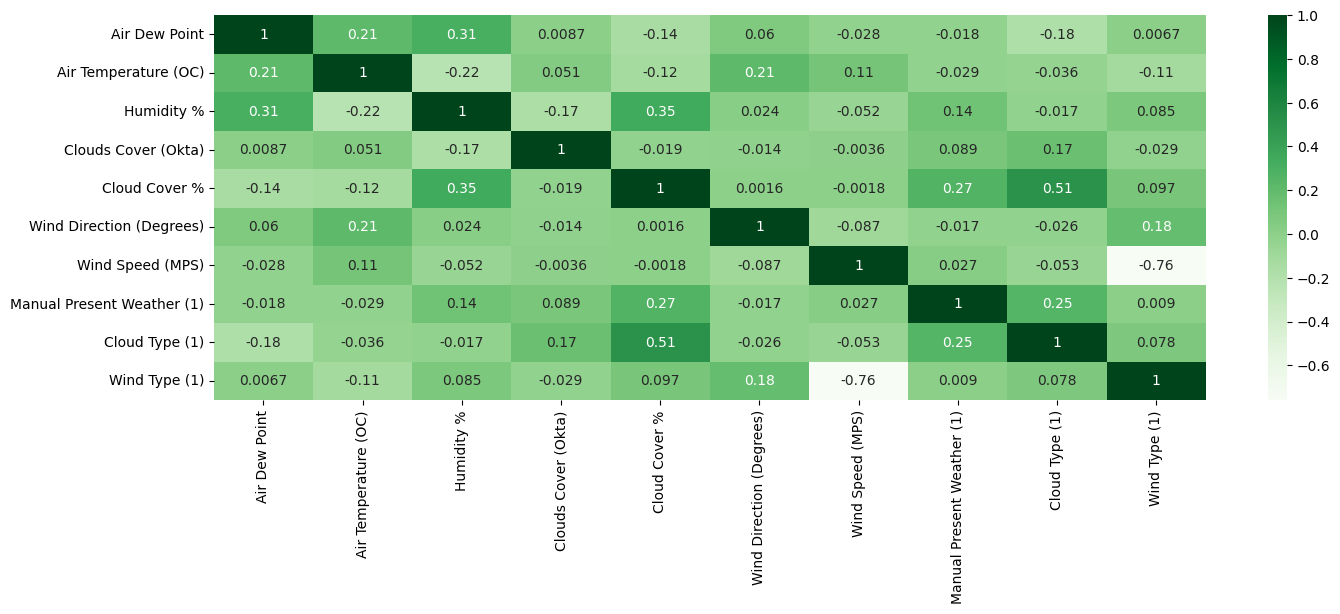

time: 2.89 s (started: 2023-06-17 20:53:11 +00:00)


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_panda = df_dropped.toPandas()
plt.figure(figsize=(16,5))
sns.heatmap(df_panda.corr(), cmap="Greens", annot=True,fmt='.2g')

In [54]:
df_panda.describe()

,Air Dew Point,Air Temperature (OC),Humidity %,Clouds Cover (Okta),Cloud Cover %,Wind Direction (Degrees),Wind Speed (MPS),Manual Present Weather (1),Cloud Type (1),Wind Type (1)
count,8043.000000,8043.000000,8043.000000,8043.000000,8042.00000,8043.000000,8043.000000,8043.000000,8043.000000,8043.000000
mean,6.981102,18.917568,47.353351,3.980729,2.25230,241.639935,1.728833,0.017282,0.016785,0.288450
std,2.325671,7.651905,7.665895,0.263415,10.34069,64.017326,1.450741,0.333900,0.166422,0.453069
min,-20.000000,0.000000,11.000000,1.000000,0.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,12.000000,47.000000,4.000000,0.00000,250.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,19.000000,47.000000,4.000000,0.00000,260.000000,2.000000,0.000000,0.000000,0.000000
75%,7.000000,24.000000,47.000000,4.000000,0.00000,270.000000,3.000000,0.000000,0.000000,1.000000
max,24.000000,52.000000,100.000000,8.000000,100.00000,360.000000,21.000000,12.000000,5.000000,1.000000


time: 56.9 ms (started: 2023-06-17 20:53:14 +00:00)


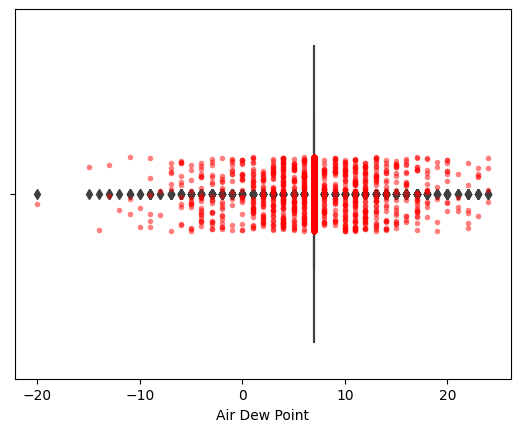



Air Dew Point




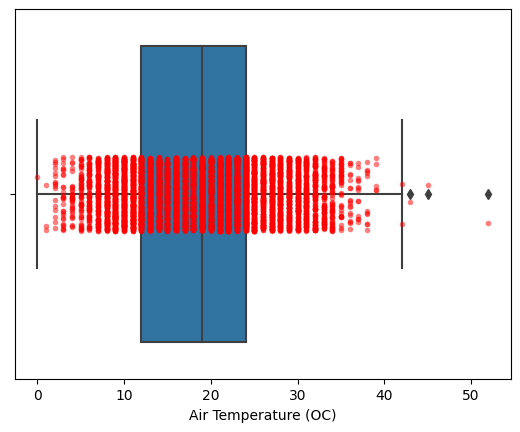



Air Temperature (OC)




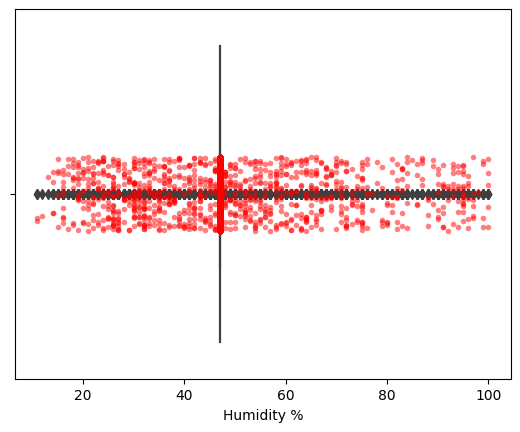



Humidity %




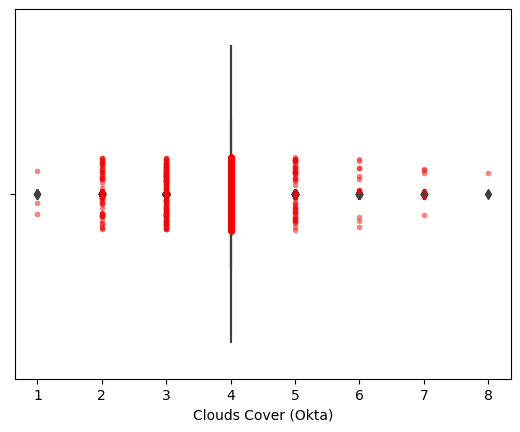



Clouds Cover (Okta)




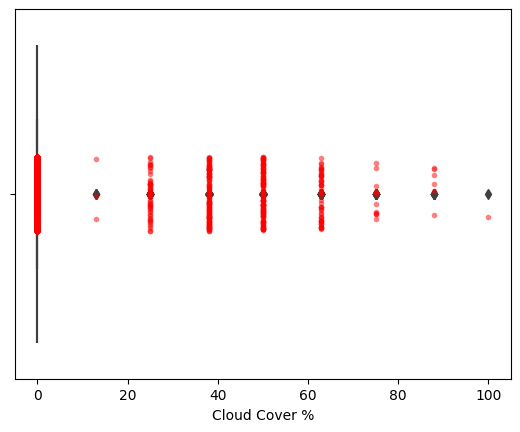



Cloud Cover %




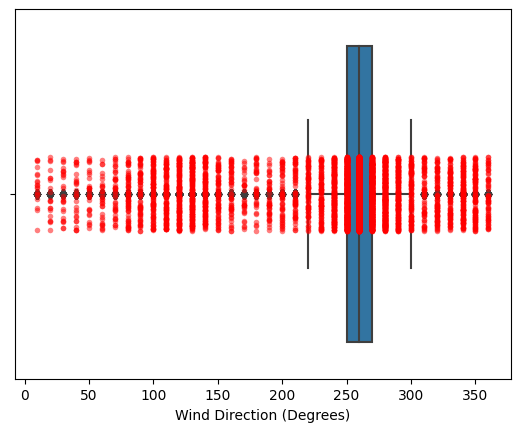



Wind Direction (Degrees)




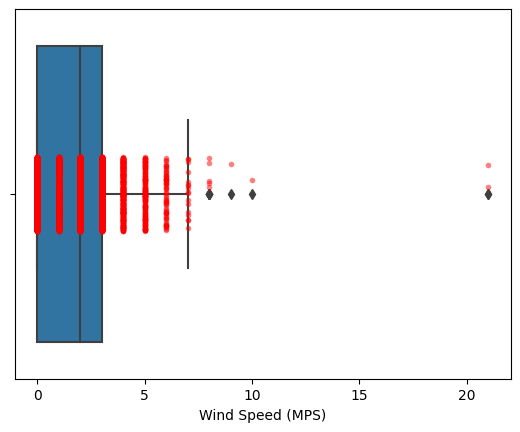



Wind Speed (MPS)




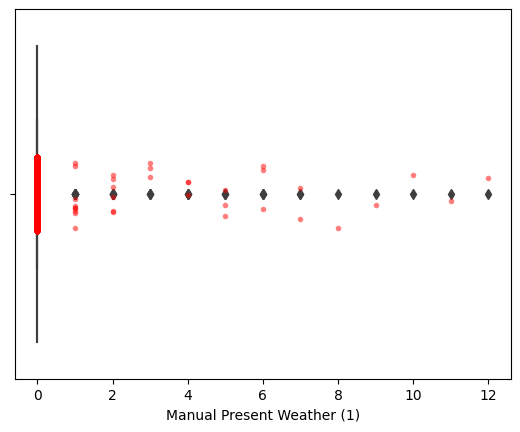



Manual Present Weather (1)




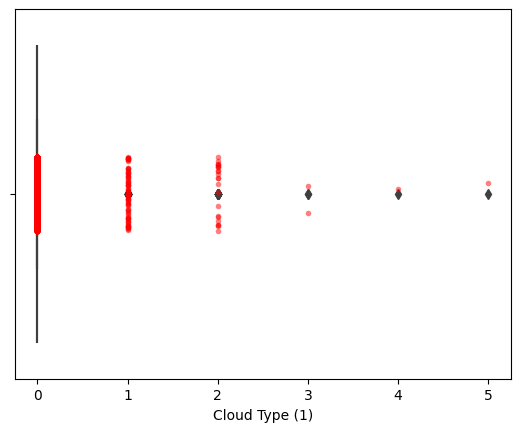



Cloud Type (1)




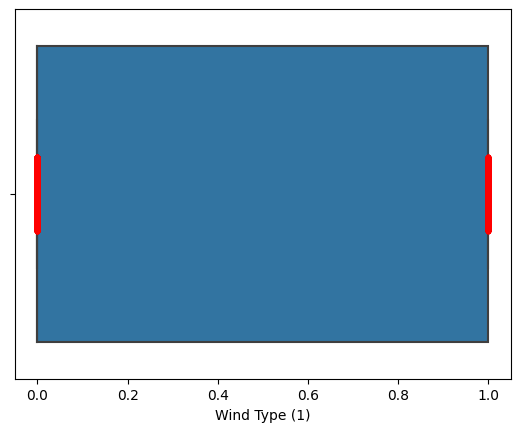



Wind Type (1)


time: 2.13 s (started: 2023-06-17 20:53:14 +00:00)


In [55]:
for x in df_panda.drop('Date/Time',axis=1).columns:
  sns.boxplot(data=df_panda, x= df_panda[x])
  sns.stripplot(x=df_panda[x], color='red', size=4, alpha=0.5)
  plt.show()

  print('\n')
  print(x)
  print('\n')

  plt.show()

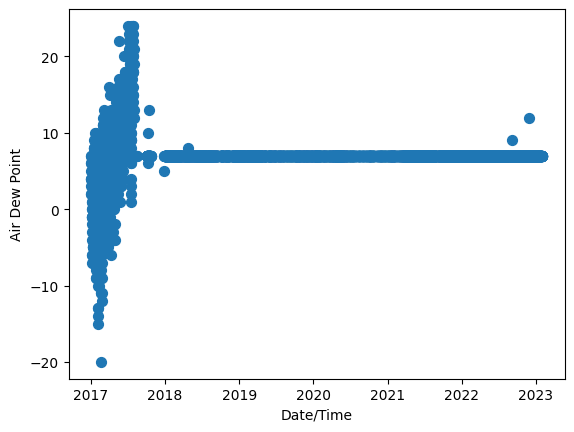

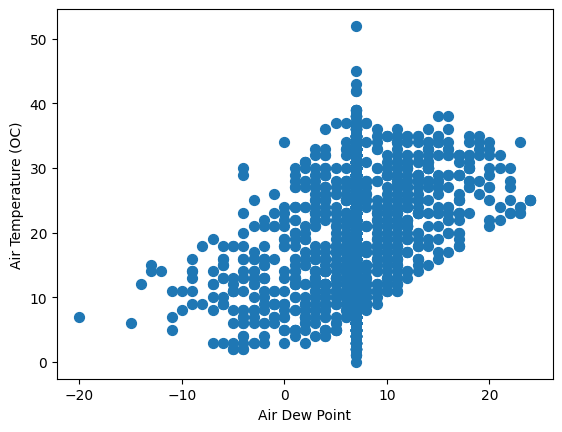

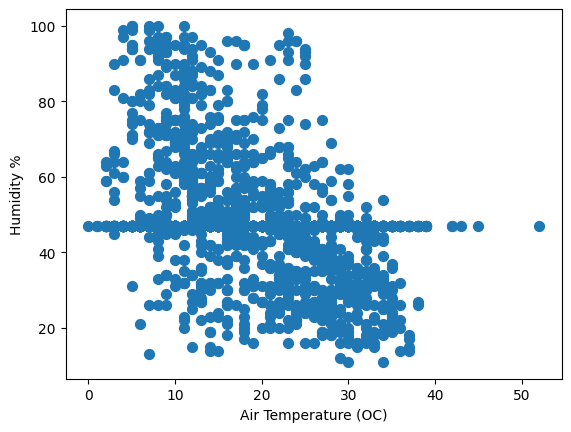

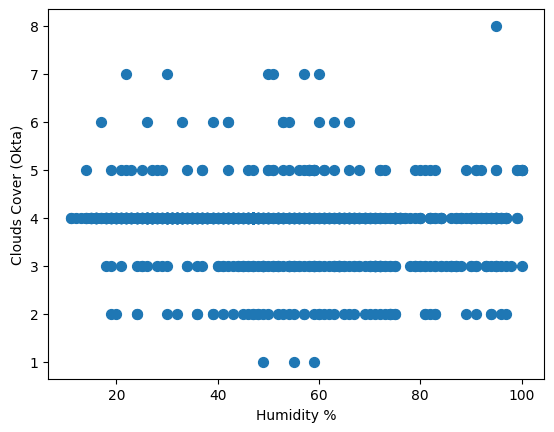

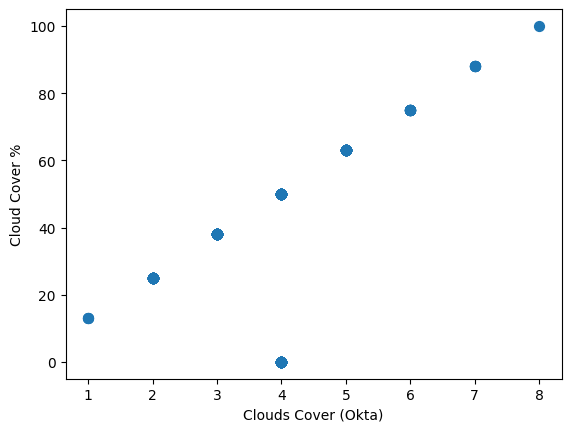

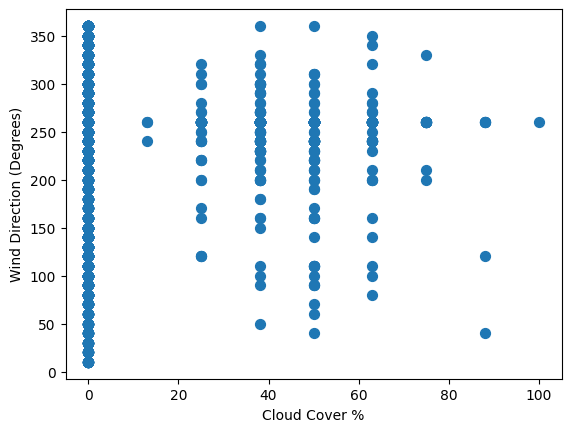

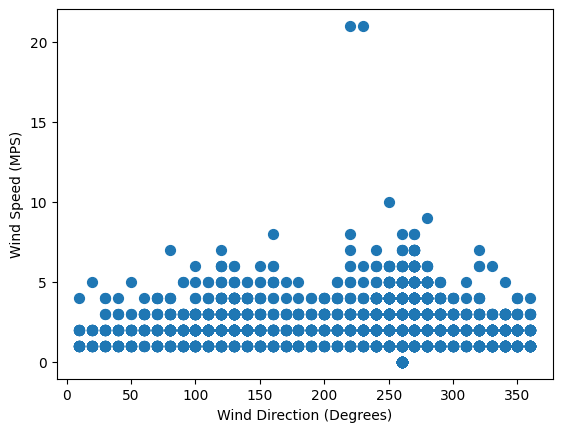

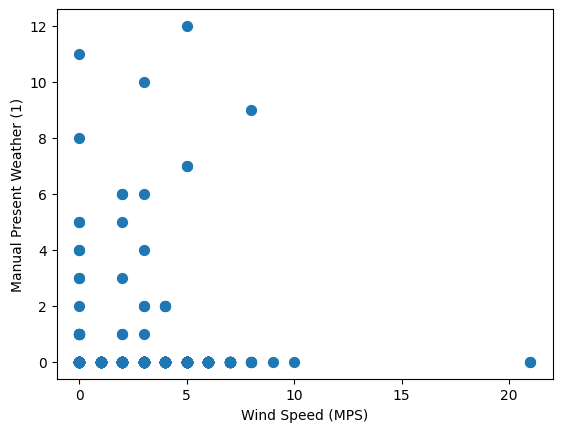

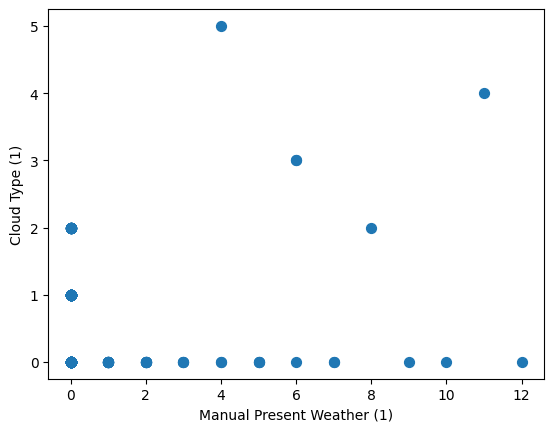

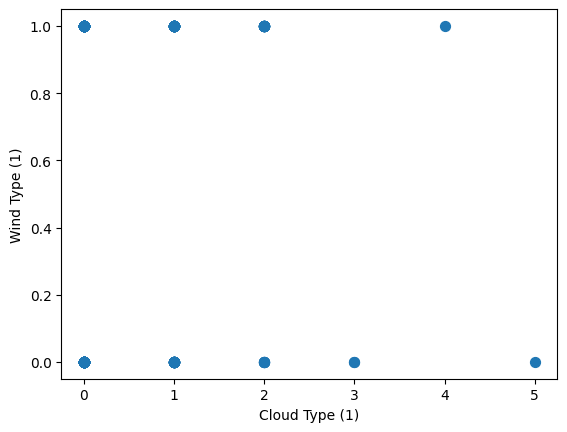

time: 2.79 s (started: 2023-06-17 20:53:17 +00:00)


In [56]:
for x in range(df_panda.shape[1]):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  scatter = ax.scatter(df_panda.iloc[:,x],df_panda.iloc[:,x+1],s=50)

  ax.set_xlabel(df_panda.columns[x])
  ax.set_ylabel(df_panda.columns[x+1])

  if(x==df_panda.shape[1]-2):
    break



Date/Time




<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')


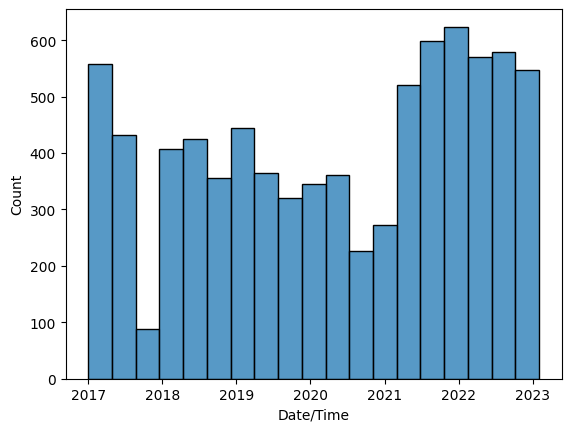

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Air Dew Point




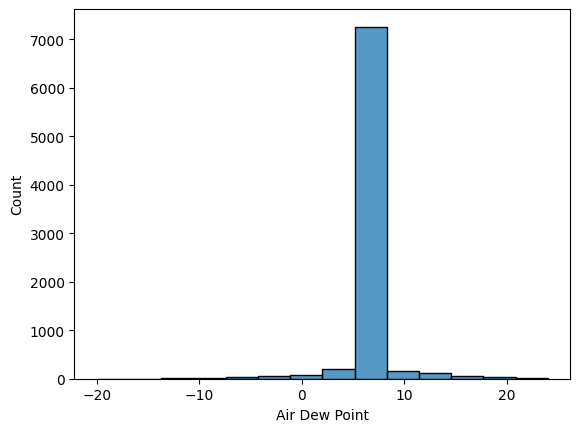

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Air Temperature (OC)




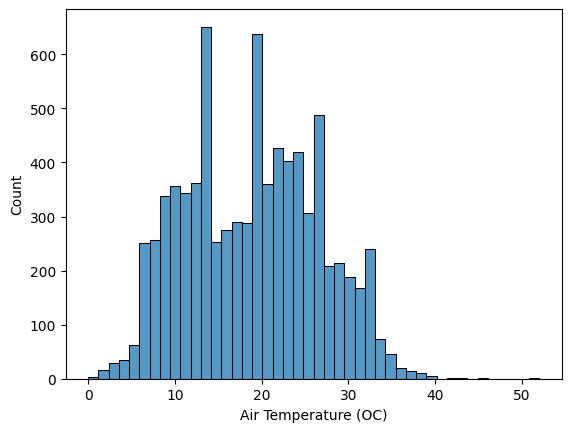

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Humidity %




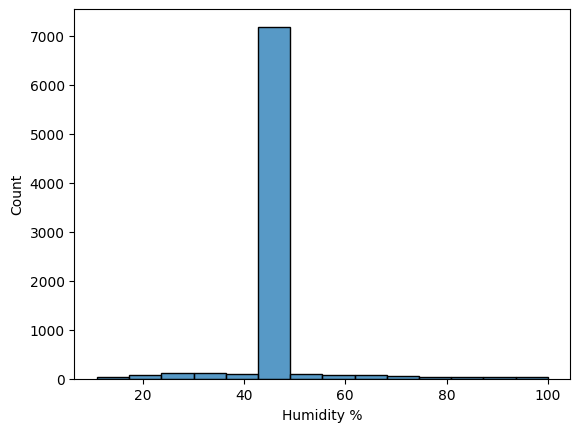

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Clouds Cover (Okta)




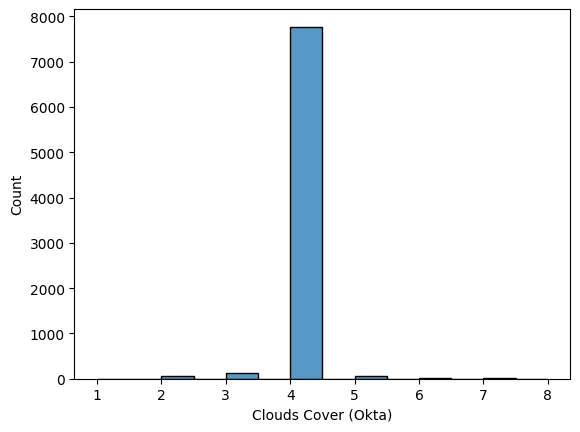

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Cloud Cover %




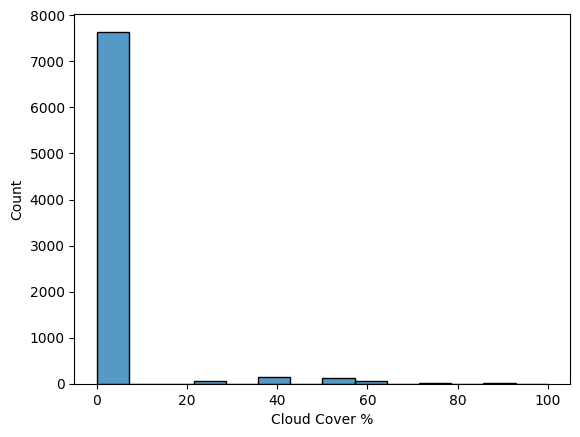

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Wind Direction (Degrees)




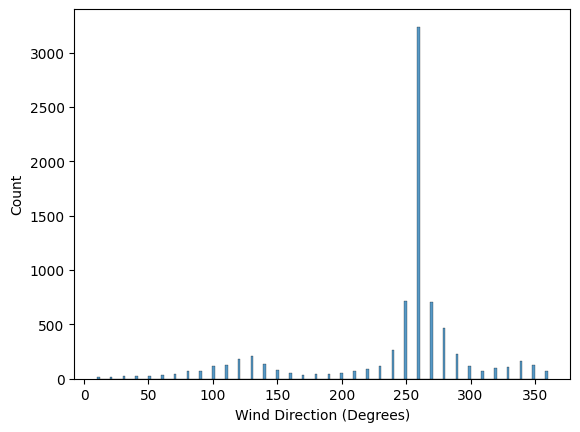

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Wind Speed (MPS)




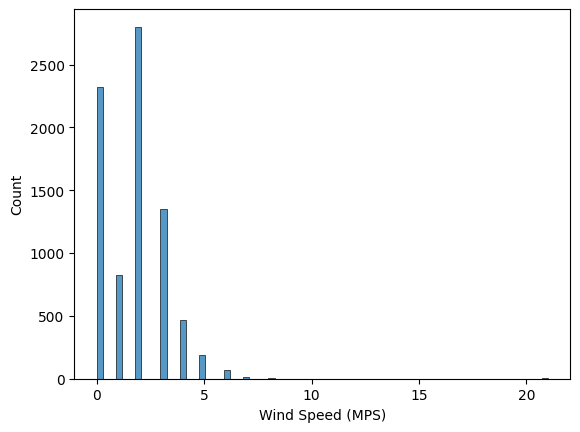

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Manual Present Weather (1)




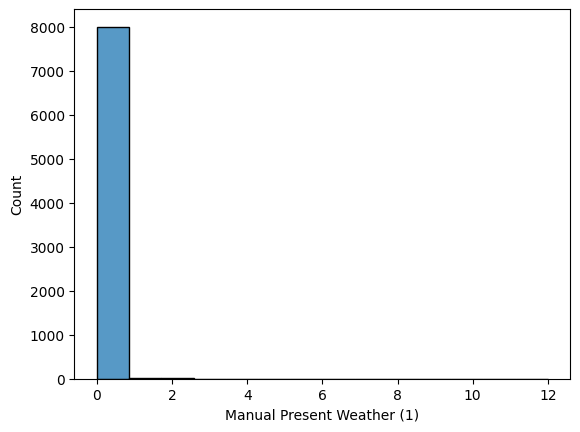

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Cloud Type (1)




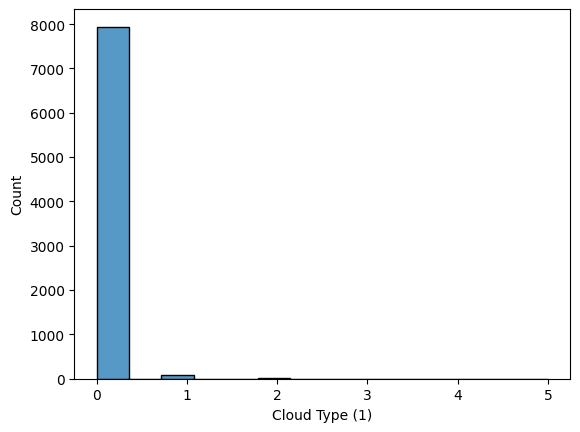

<ipython-input-57-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Wind Type (1)




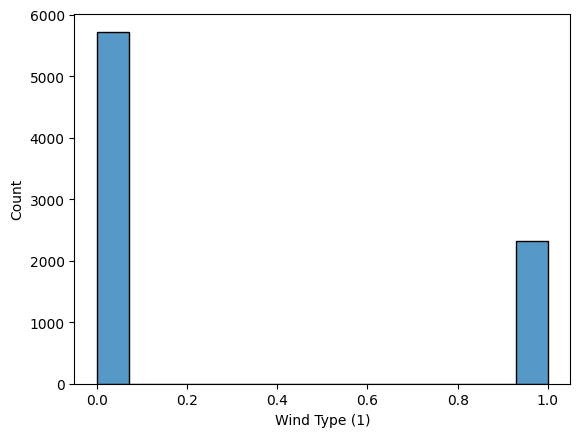

time: 4.2 s (started: 2023-06-17 20:53:19 +00:00)


In [57]:
for x in df_panda.columns:
  sns.histplot(df_panda[x],palette = 'hls')

  print('\n')
  print(x)
  print('\n')

  plt.show()

In [58]:
split_date= F.split(df_dropped['Date/Time'], ' ')
df_dropped= df_dropped.withColumn('Date', split_date.getItem(0))
df_dropped= df_dropped.withColumn('Hours', split_date.getItem(1))


time: 62.4 ms (started: 2023-06-17 20:53:24 +00:00)


In [59]:
df_dropped2 = df_dropped.drop(*['Date/Time'])

time: 29.5 ms (started: 2023-06-17 20:53:24 +00:00)


In [60]:
df_dropped2.show()

+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+----------+--------+
|Air Dew Point|Air Temperature (OC)|Humidity %|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|      Date|   Hours|
+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+----------+--------+
|            4|                   5|        94|                  2|           25|                     260|               0|                       0.0|           0.0|          1.0|2017-01-01|06:00:00|
|            7|                   8|        91|                  2|           25|                     300|               3|                       0.0|           0.0|          0.0|2017-01-01|09:00:00|


In [61]:
split_date= F.split(df_dropped2['Date'], '-')
df_dropped2 = df_dropped2.withColumn('Year', split_date.getItem(0))
df_dropped2 = df_dropped2.withColumn('Month', split_date.getItem(1))
df_dropped2 = df_dropped2.withColumn('Day', split_date.getItem(2))

time: 51.4 ms (started: 2023-06-17 20:53:24 +00:00)


In [62]:
df_dropped3 = df_dropped2.drop('Date')

time: 29.2 ms (started: 2023-06-17 20:53:24 +00:00)


In [63]:
df_dropped3.show()

+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+--------+----+-----+---+
|Air Dew Point|Air Temperature (OC)|Humidity %|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|   Hours|Year|Month|Day|
+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+--------+----+-----+---+
|            4|                   5|        94|                  2|           25|                     260|               0|                       0.0|           0.0|          1.0|06:00:00|2017|   01| 01|
|            7|                   8|        91|                  2|           25|                     300|               3|                       0.0|           0.0|          0.0|09:00

In [64]:
split_date= F.split(df_dropped3['Hours'], ':')
df_dropped3 = df_dropped3.withColumn('Hours', split_date.getItem(0))

time: 31.4 ms (started: 2023-06-17 20:53:25 +00:00)


In [65]:
df_dropped3.show()

+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+-----+----+-----+---+
|Air Dew Point|Air Temperature (OC)|Humidity %|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|Hours|Year|Month|Day|
+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+-----+----+-----+---+
|            4|                   5|        94|                  2|           25|                     260|               0|                       0.0|           0.0|          1.0|   06|2017|   01| 01|
|            7|                   8|        91|                  2|           25|                     300|               3|                       0.0|           0.0|          0.0|   09|2017|   01|

In [66]:
df_group = df_dropped3.groupBy('Day','Month','Year').agg({'Air Dew Point':'mean','Air Temperature (OC)':'mean','Humidity %':'mean','Clouds Cover (Okta)':'mean','Cloud Cover %':'mean','Wind Direction (Degrees)':'mean',"Wind Speed (MPS)":'mean',"Manual Present Weather (1)":'mode',"Cloud Type (1)":'mode',"Wind Type (1)":'mode'})


time: 57.9 ms (started: 2023-06-17 20:53:25 +00:00)


In [67]:
df_group.count()

2040

time: 473 ms (started: 2023-06-17 20:53:25 +00:00)


In [68]:
df_group.show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+------------------+------------------+-------------------+-------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|   avg(Humidity %)|avg(Cloud Cover %)| avg(Air Dew Point)|mode(Wind Type (1))|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+------------------+------------------+-------------------+-------------------+
| 01|   01|2017|                        266.0|                     2.6|                 0.0|                  1.2|                             0.0|                      7.8|              82.8|              22.6|                5.0|             

In [69]:
df_group.sort(['Year','Month','Day']).show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+-----------------+------------------+------------------+-------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|  avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+-----------------+------------------+------------------+-------------------+
| 01|   01|2017|                        266.0|                     2.6|                 0.0|                  1.2|                             0.0|                      7.8|             82.8|              22.6|               5.0|                1.0|


In [70]:
from pyspark.sql.types import IntegerType
#df_group = df_group.withColumn("avg(Cloud Cover %)", df_group["avg(Cloud Cover %)"].cast(IntegerType()))

time: 440 µs (started: 2023-06-17 20:53:28 +00:00)


In [71]:
for x in df_group.columns:

    df_group = df_group.withColumn(x, df_group[x].cast(IntegerType()))

time: 233 ms (started: 2023-06-17 20:53:28 +00:00)


In [72]:
df_group.printSchema()

root
 |-- Day: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- avg(Wind Direction (Degrees)): integer (nullable = true)
 |-- avg(Clouds Cover (Okta)): integer (nullable = true)
 |-- mode(Cloud Type (1)): integer (nullable = true)
 |-- avg(Wind Speed (MPS)): integer (nullable = true)
 |-- mode(Manual Present Weather (1)): integer (nullable = true)
 |-- avg(Air Temperature (OC)): integer (nullable = true)
 |-- avg(Humidity %): integer (nullable = true)
 |-- avg(Cloud Cover %): integer (nullable = true)
 |-- avg(Air Dew Point): integer (nullable = true)
 |-- mode(Wind Type (1)): integer (nullable = true)

time: 2.76 ms (started: 2023-06-17 20:53:28 +00:00)


In [73]:
df_group.show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                               0|                        7|             82|                22|                 5|                  1|
|  1|   

In [74]:
df_pandas_grouped = df_group.toPandas()

time: 876 ms (started: 2023-06-17 20:53:29 +00:00)


In [75]:
for x in df_group.columns:
  df_group.groupBy(x).count().show()

+---+-----+
|Day|count|
+---+-----+
| 31|   38|
| 28|   68|
| 27|   65|
| 26|   65|
| 12|   68|
| 22|   62|
|  1|   68|
| 13|   70|
|  6|   69|
| 16|   68|
|  3|   67|
| 20|   67|
|  5|   69|
| 19|   65|
| 15|   68|
|  9|   69|
| 17|   66|
|  4|   65|
|  8|   67|
| 23|   66|
+---+-----+
only showing top 20 rows

+-----+-----+
|Month|count|
+-----+-----+
|   12|  156|
|    1|  217|
|    6|  177|
|    3|  186|
|    5|  182|
|    9|  135|
|    4|  180|
|    8|  152|
|    7|  178|
|   10|  172|
|   11|  140|
|    2|  165|
+-----+-----+

+----+-----+
|Year|count|
+----+-----+
|2018|  353|
|2023|   31|
|2022|  361|
|2019|  352|
|2020|  340|
|2017|  246|
|2021|  357|
+----+-----+

+-----------------------------+-----+
|avg(Wind Direction (Degrees))|count|
+-----------------------------+-----+
|                          148|    3|
|                          243|   10|
|                          251|    6|
|                           85|    1|
|                          255|   56|
|            

In [76]:
for x in df_dropped.columns:
  df_dropped.groupBy(x).count().show()

+-------------------+-----+
|          Date/Time|count|
+-------------------+-----+
|2017-10-19 03:00:00|    1|
|2017-02-23 18:00:00|    1|
|2017-05-06 15:00:00|    1|
|2017-06-15 06:00:00|    1|
|2017-07-07 18:00:00|    1|
|2018-06-02 06:00:00|    1|
|2018-10-14 12:00:00|    1|
|2019-01-17 18:00:00|    1|
|2019-02-01 18:00:00|    1|
|2019-06-18 00:00:00|    1|
|2019-12-12 06:00:00|    1|
|2020-01-21 12:00:00|    1|
|2020-07-13 00:00:00|    1|
|2021-03-11 18:00:00|    1|
|2021-04-02 18:00:00|    1|
|2021-04-27 15:00:00|    1|
|2021-05-21 18:00:00|    1|
|2021-07-12 12:00:00|    1|
|2021-07-18 15:00:00|    1|
|2021-07-20 00:00:00|    1|
+-------------------+-----+
only showing top 20 rows

+-------------+-----+
|Air Dew Point|count|
+-------------+-----+
|          -13|    2|
|          -20|    1|
|           -1|   14|
|          -10|    2|
|          -11|    3|
|           12|   54|
|           22|    6|
|          -15|    1|
|            1|   37|
|           13|   40|
|            6| 

In [77]:
df_pandas_group_dropped= df_pandas_grouped.drop(['Day','Year','Month'],axis=1)

time: 4.03 ms (started: 2023-06-17 20:53:42 +00:00)


In [78]:
df_pandas_grouped.describe()

,Day,Month,Year,avg(Wind Direction (Degrees)),avg(Clouds Cover (Okta)),mode(Cloud Type (1)),avg(Wind Speed (MPS)),mode(Manual Present Weather (1)),avg(Air Temperature (OC)),avg(Humidity %),avg(Cloud Cover %),avg(Air Dew Point),mode(Wind Type (1))
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,15.640686,6.179412,2019.694118,241.429412,3.957843,0.008333,1.374510,0.001471,18.777451,47.274020,1.846078,6.980392,0.176961
std,8.790394,3.462426,1.696306,48.626005,0.234761,0.105880,1.031594,0.049498,7.063745,5.571499,8.479895,1.941925,0.381729
min,1.000000,1.000000,2017.000000,50.000000,2.000000,0.000000,0.000000,0.000000,2.000000,17.000000,0.000000,-10.000000,0.000000
25%,8.000000,3.000000,2018.000000,226.000000,4.000000,0.000000,1.000000,0.000000,12.000000,47.000000,0.000000,7.000000,0.000000
50%,15.500000,6.000000,2020.000000,260.000000,4.000000,0.000000,1.000000,0.000000,20.000000,47.000000,0.000000,7.000000,0.000000
75%,23.000000,9.000000,2021.000000,270.000000,4.000000,0.000000,2.000000,0.000000,25.000000,47.000000,0.000000,7.000000,0.000000
max,31.000000,12.000000,2023.000000,350.000000,6.000000,2.000000,12.000000,2.000000,42.000000,96.000000,75.000000,21.000000,1.000000


time: 51.5 ms (started: 2023-06-17 20:53:42 +00:00)




avg(Wind Direction (Degrees))




<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')


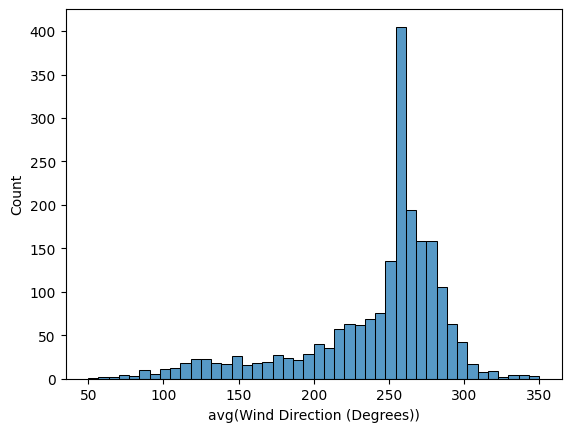

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Clouds Cover (Okta))




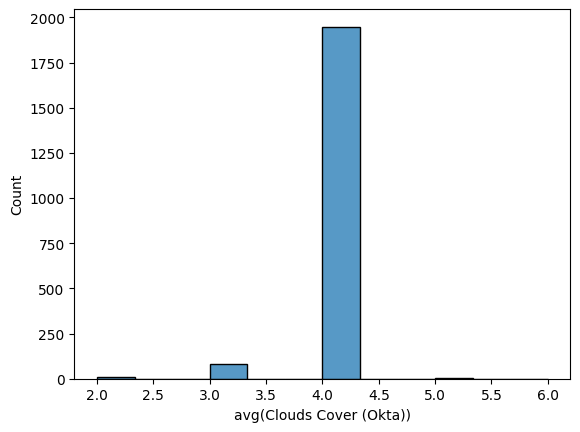

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




mode(Cloud Type (1))




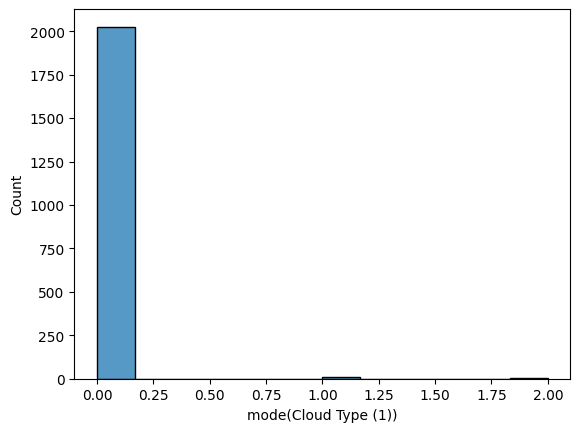

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Wind Speed (MPS))




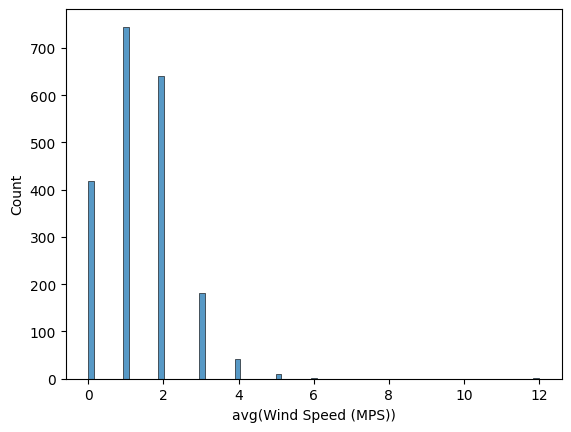

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




mode(Manual Present Weather (1))




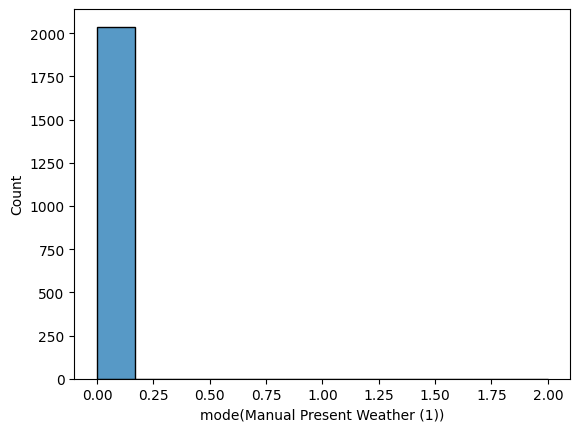

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Air Temperature (OC))




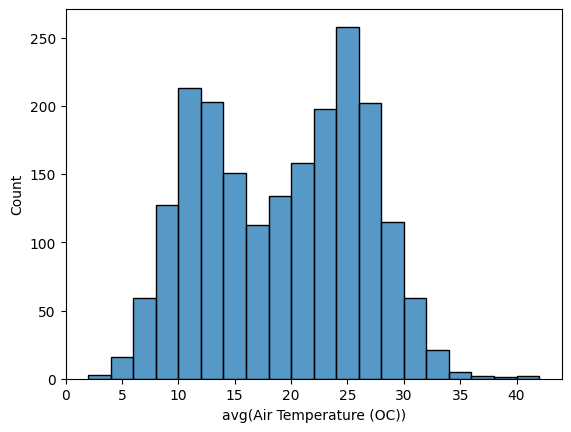

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Humidity %)




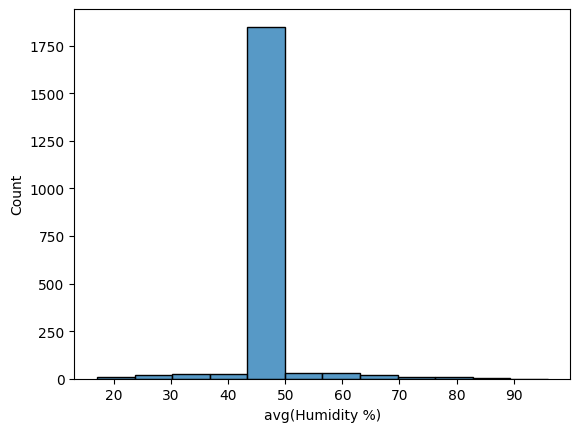

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Cloud Cover %)




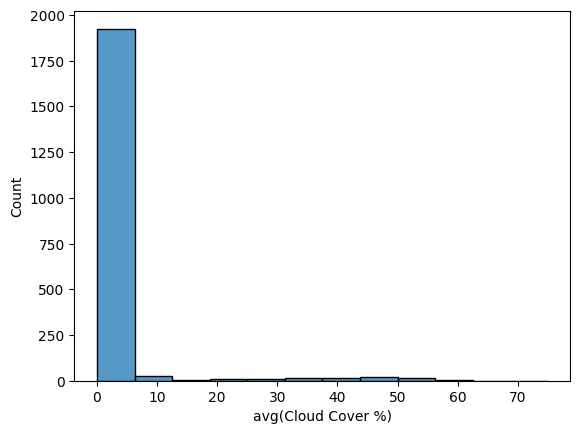

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Air Dew Point)




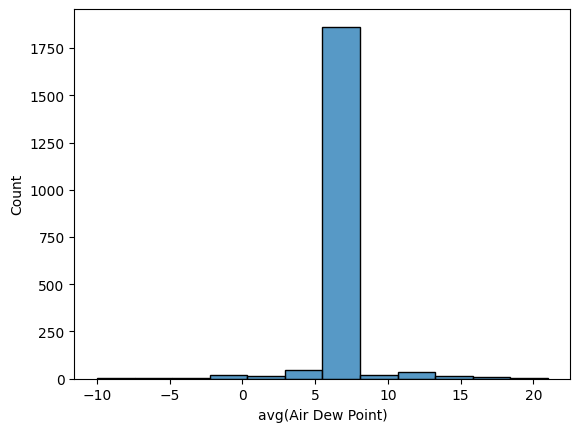

<ipython-input-79-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




mode(Wind Type (1))




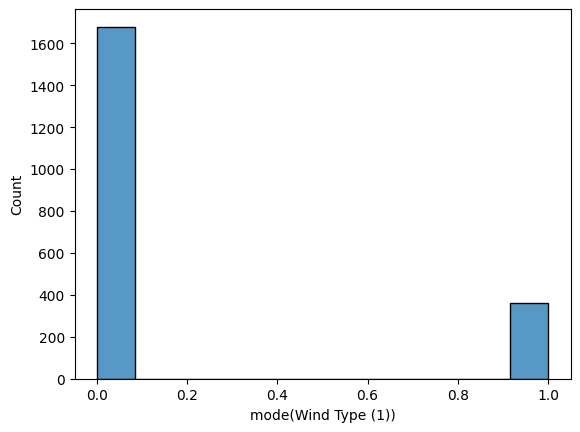

time: 2.65 s (started: 2023-06-17 20:53:42 +00:00)


In [79]:
for x in df_pandas_group_dropped.columns:
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')

  print('\n')
  print(x)
  print('\n')

  plt.show()

<Axes: >

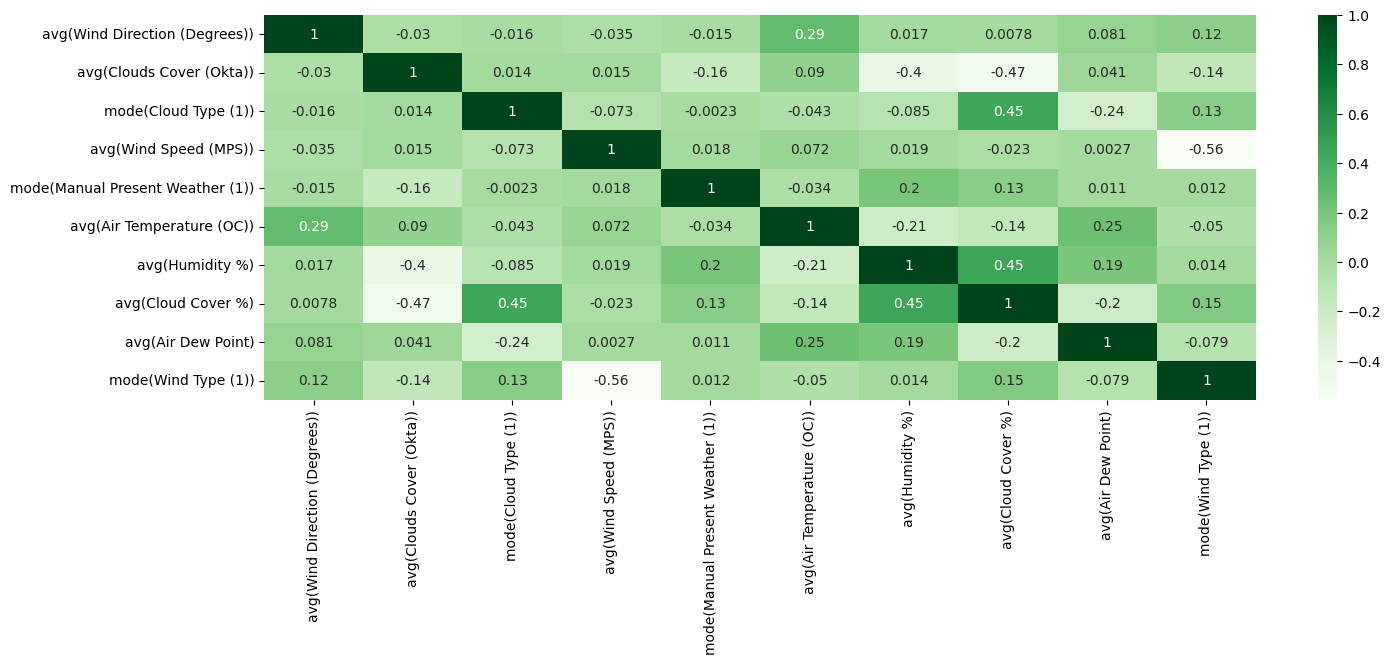

time: 872 ms (started: 2023-06-17 20:53:44 +00:00)


In [80]:
plt.figure(figsize=(16,5))
sns.heatmap(df_pandas_group_dropped.corr(), cmap="Greens", annot=True,fmt='.2g')

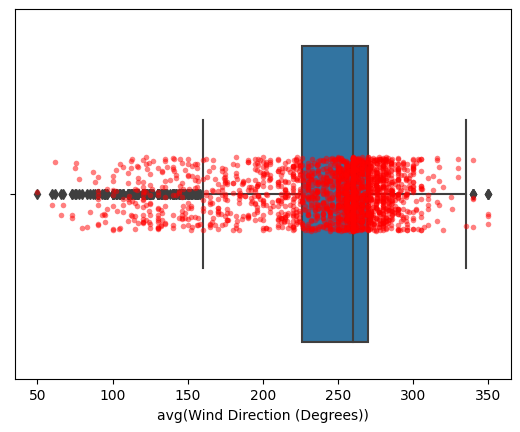



avg(Wind Direction (Degrees))




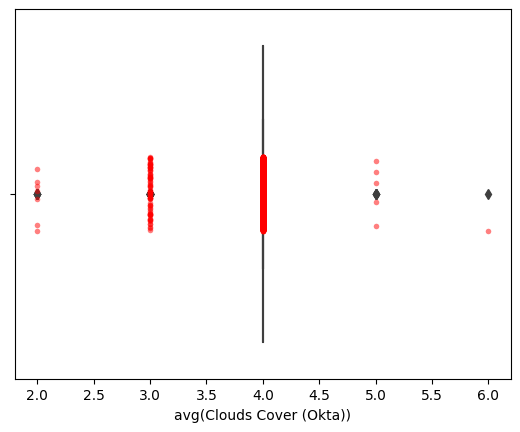



avg(Clouds Cover (Okta))




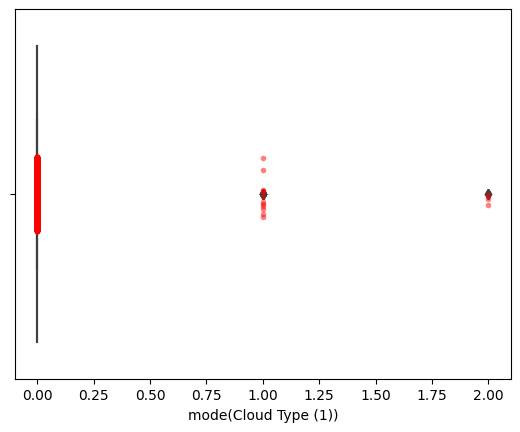



mode(Cloud Type (1))




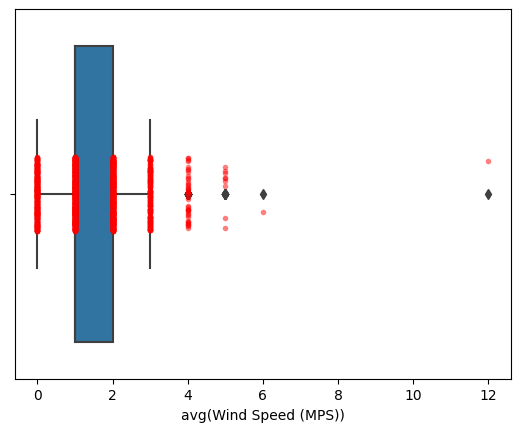



avg(Wind Speed (MPS))




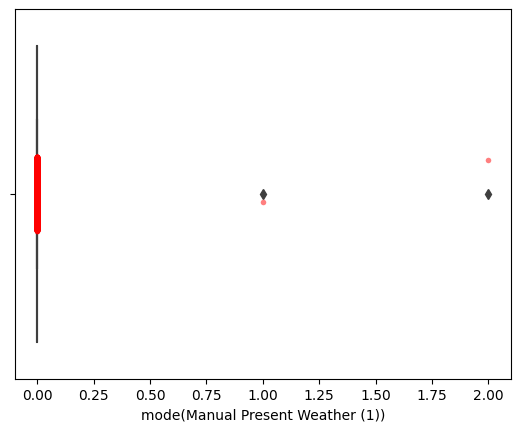



mode(Manual Present Weather (1))




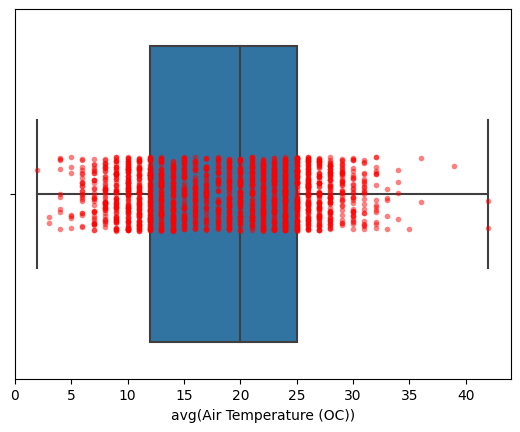



avg(Air Temperature (OC))




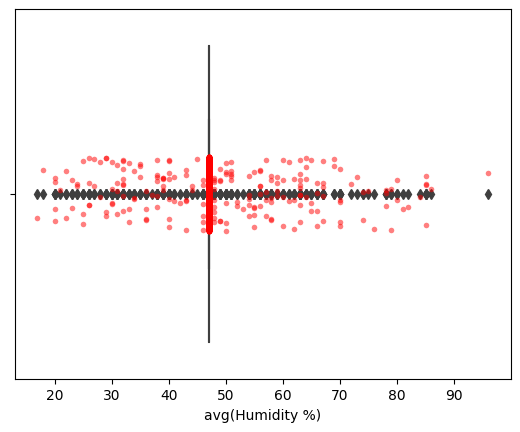



avg(Humidity %)




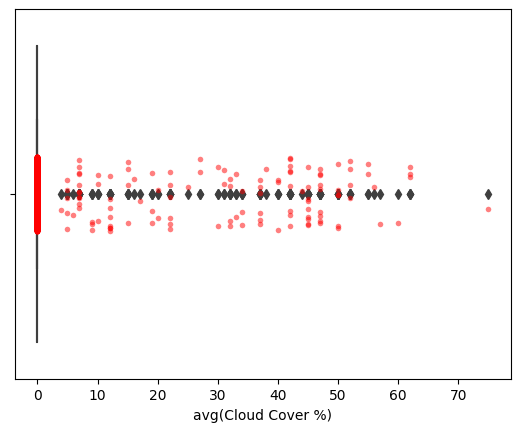



avg(Cloud Cover %)




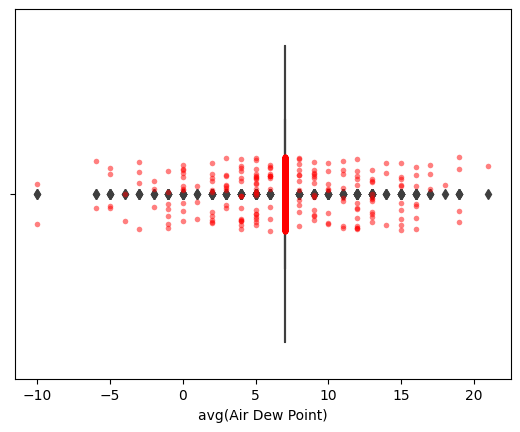



avg(Air Dew Point)




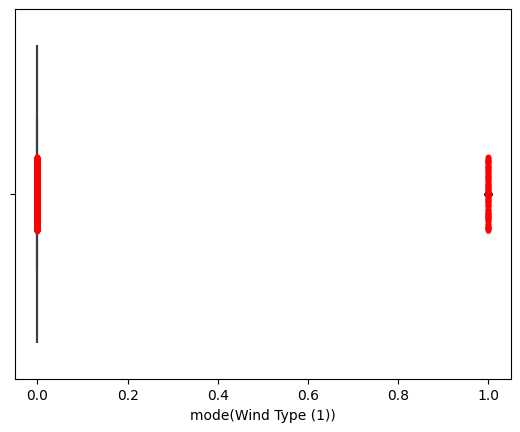



mode(Wind Type (1))


time: 2.01 s (started: 2023-06-17 20:53:45 +00:00)


In [81]:
for x in df_pandas_group_dropped.columns:
  sns.boxplot(data=df_pandas_group_dropped, x= df_pandas_group_dropped[x])
  sns.stripplot(x=df_pandas_group_dropped[x], color='red', size=4, alpha=0.5)
  plt.show()

  print('\n')
  print(x)
  print('\n')

  plt.show()

In [82]:
df_pandas_group_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   avg(Wind Direction (Degrees))     2040 non-null   int32
 1   avg(Clouds Cover (Okta))          2040 non-null   int32
 2   mode(Cloud Type (1))              2040 non-null   int32
 3   avg(Wind Speed (MPS))             2040 non-null   int32
 4   mode(Manual Present Weather (1))  2040 non-null   int32
 5   avg(Air Temperature (OC))         2040 non-null   int32
 6   avg(Humidity %)                   2040 non-null   int32
 7   avg(Cloud Cover %)                2040 non-null   int32
 8   avg(Air Dew Point)                2040 non-null   int32
 9   mode(Wind Type (1))               2040 non-null   int32
dtypes: int32(10)
memory usage: 79.8 KB
time: 14.4 ms (started: 2023-06-17 20:53:47 +00:00)


In [83]:
df_group.printSchema()

root
 |-- Day: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- avg(Wind Direction (Degrees)): integer (nullable = true)
 |-- avg(Clouds Cover (Okta)): integer (nullable = true)
 |-- mode(Cloud Type (1)): integer (nullable = true)
 |-- avg(Wind Speed (MPS)): integer (nullable = true)
 |-- mode(Manual Present Weather (1)): integer (nullable = true)
 |-- avg(Air Temperature (OC)): integer (nullable = true)
 |-- avg(Humidity %): integer (nullable = true)
 |-- avg(Cloud Cover %): integer (nullable = true)
 |-- avg(Air Dew Point): integer (nullable = true)
 |-- mode(Wind Type (1)): integer (nullable = true)

time: 1.41 ms (started: 2023-06-17 20:53:47 +00:00)


In [84]:
df_group = df_group.withColumn('Season',F.when(F.col('Month').between(3,9),'summer').otherwise("winter"))

time: 34.5 ms (started: 2023-06-17 20:53:47 +00:00)


In [85]:
df_group = df_group.drop('Sesason')

time: 11.2 ms (started: 2023-06-17 20:53:47 +00:00)


In [86]:
df_group.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                               0|                        7|             82|                22|                 5|        

In [87]:
Myschema = StructType([
StructField('Year', IntegerType(),True),
StructField('Season', StringType(),True),
StructField('crop', StringType(),True),
StructField('level', DoubleType(),True),])
crop_production = spark.read.csv("/content/Irbid crop production.csv",header=True,schema=Myschema)

time: 64 ms (started: 2023-06-17 20:53:49 +00:00)


In [88]:
crop_production.show()

+----+------+---------+-------+
|Year|Season|     crop|  level|
+----+------+---------+-------+
|2017|summer| tomatoes|   null|
|2017|winter| tomatoes| 9332.2|
|2017|summer|Eggplants|  575.5|
|2017|winter|Eggplants|  228.6|
|2017|summer|  cabbage|    0.0|
|2017|winter|  cabbage|  321.4|
|2018|summer| tomatoes|15540.4|
|2018|winter| tomatoes| 1509.9|
|2018|summer|Eggplants|  668.7|
|2018|winter|Eggplants|   76.4|
|2018|summer|  cabbage|  630.0|
|2018|winter|  cabbage|    0.0|
|2019|summer| tomatoes| 6292.4|
|2019|winter| tomatoes|    0.0|
|2019|summer|Eggplants|  600.0|
|2019|winter|Eggplants|    0.0|
|2019|summer|  cabbage| 2520.0|
|2019|winter|  cabbage|    0.0|
|2020|summer| tomatoes| 5122.7|
|2020|winter| tomatoes| 3060.0|
+----+------+---------+-------+
only showing top 20 rows

time: 243 ms (started: 2023-06-17 20:53:49 +00:00)


In [89]:
df_group.show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                               0|                        7|             82|                22|                 5|        

In [90]:
filters = [df_group.Season == crop_production.Season, df_group.Year == crop_production.Year]

time: 10.5 ms (started: 2023-06-17 20:53:51 +00:00)


In [91]:
crops_weather = df_group.join(crop_production, filters, 'inner').drop(*[crop_production.Season,crop_production.Year])

time: 76.3 ms (started: 2023-06-17 20:53:51 +00:00)


In [92]:
crops_weather.count()

4944

time: 917 ms (started: 2023-06-17 20:53:51 +00:00)


In [93]:
crops_weather.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop| level|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                               0|                        7|           

In [94]:
Dict_Null = {col:crops_weather.filter(crops_weather[col].isNull()).count() for col in crops_weather.columns}
Dict_Null

{'Day': 0,
 'Month': 0,
 'Year': 0,
 'avg(Wind Direction (Degrees))': 0,
 'avg(Clouds Cover (Okta))': 0,
 'mode(Cloud Type (1))': 0,
 'avg(Wind Speed (MPS))': 0,
 'mode(Manual Present Weather (1))': 0,
 'avg(Air Temperature (OC))': 0,
 'avg(Humidity %)': 0,
 'avg(Cloud Cover %)': 0,
 'avg(Air Dew Point)': 0,
 'mode(Wind Type (1))': 0,
 'Season': 0,
 'crop': 0,
 'level': 161}

time: 9.2 s (started: 2023-06-17 20:53:53 +00:00)


In [95]:
crops_weather = crops_weather.na.drop(subset='level')

time: 43.3 ms (started: 2023-06-17 20:54:02 +00:00)


In [96]:
for x in crops_weather.columns:
  crops_weather.groupBy(x).count().show()

+---+-----+
|Day|count|
+---+-----+
| 31|   87|
| 28|  160|
| 26|  154|
| 27|  151|
| 12|  160|
| 22|  145|
|  1|  159|
| 13|  165|
|  6|  162|
| 16|  160|
|  3|  156|
| 20|  157|
|  5|  163|
| 19|  151|
| 15|  160|
| 17|  154|
|  9|  162|
|  4|  151|
|  8|  160|
| 23|  154|
+---+-----+
only showing top 20 rows

+-----+-----+
|Month|count|
+-----+-----+
|   12|  378|
|    1|  465|
|    6|  411|
|    3|  434|
|    5|  422|
|    9|  315|
|    4|  420|
|    8|  361|
|    7|  410|
|   10|  423|
|   11|  333|
|    2|  411|
+-----+-----+

+----+-----+
|Year|count|
+----+-----+
|2018| 1059|
|2019| 1056|
|2020| 1020|
|2017|  577|
|2021| 1071|
+----+-----+

+-----------------------------+-----+
|avg(Wind Direction (Degrees))|count|
+-----------------------------+-----+
|                          148|    6|
|                          243|   24|
|                          251|    9|
|                           85|    3|
|                          255|  142|
|                          296|   22|
|

In [97]:
crops_weather_tomato = crops_weather.filter(crops_weather['crop'] == 'tomatoes')

time: 119 ms (started: 2023-06-17 20:54:15 +00:00)


In [98]:
crops_weather_tomato.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+-------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop|  level|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+-------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                               0|                        7|           

In [99]:
crops_weather_tomato.count()

1487

time: 646 ms (started: 2023-06-17 20:54:16 +00:00)


In [100]:
crops_weather_tomato = crops_weather_tomato.withColumn('Status days(Temp)', (F.when(((F.col('avg(Air Temperature (OC))')) >= 35) | (F.col('avg(Air Temperature (OC))') <= 0), 0)).otherwise(1)) ## 0 is bad and 1 is good

time: 62.8 ms (started: 2023-06-17 20:54:17 +00:00)


In [101]:
crops_weather_tomato.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+-------+-----------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop|  level|Status days(Temp)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+-------+-----------------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                

In [102]:
crops_weather_tomato.groupBy('Status days(Temp)').count().show() ## bad days are 298

+-----------------+-----+
|Status days(Temp)|count|
+-----------------+-----+
|                1| 1482|
|                0|    5|
+-----------------+-----+

time: 575 ms (started: 2023-06-17 20:54:19 +00:00)


In [103]:
bad_days_level_tomatoes = crops_weather_tomato.filter(crops_weather_tomato['Status days(Temp)'] == 0).select('level')

time: 28.3 ms (started: 2023-06-17 20:54:20 +00:00)


In [104]:
Good_days_level_tomatoes = crops_weather_tomato.filter(crops_weather_tomato['Status days(Temp)'] == 1).select('level')

time: 26.6 ms (started: 2023-06-17 20:54:20 +00:00)


In [105]:
bad_days_level_tomatoes.show()

+------+
| level|
+------+
|3060.0|
|5122.7|
|6292.4|
|5122.7|
|5122.7|
+------+

time: 435 ms (started: 2023-06-17 20:54:20 +00:00)


In [106]:
Good_days_level_tomatoes.show()

+-------+
|  level|
+-------+
| 1509.9|
|    0.0|
| 6292.4|
| 5122.7|
| 2968.9|
|    0.0|
|15540.4|
|15540.4|
| 6292.4|
| 6292.4|
| 1046.7|
| 2968.9|
| 2968.9|
|    0.0|
| 5122.7|
| 9332.2|
| 1509.9|
| 6292.4|
| 6292.4|
|    0.0|
+-------+
only showing top 20 rows

time: 528 ms (started: 2023-06-17 20:54:20 +00:00)


In [107]:
crops_weather_egplants = crops_weather.filter(crops_weather['crop'] == 'Eggplants')
crops_weather_egplants = crops_weather_egplants.withColumn('Status days(Temp)', (F.when(((F.col('avg(Air Temperature (OC))')) >= 35) | (F.col('avg(Air Temperature (OC))') <= 10), 0)).otherwise(1)) ## 0 is bad and 1 is good
crops_weather_egplants.show()
crops_weather_egplants.count()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+-----+-----------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop|level|Status days(Temp)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+-----+-----------------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                   

1648

time: 1.2 s (started: 2023-06-17 20:54:21 +00:00)


In [108]:
crops_weather_egplants.groupBy('Status days(Temp)').count().show() #bad days are 300

+-----------------+-----+
|Status days(Temp)|count|
+-----------------+-----+
|                1| 1408|
|                0|  240|
+-----------------+-----+

time: 748 ms (started: 2023-06-17 20:54:22 +00:00)


In [109]:
bad_days_level_eggplants = crops_weather_egplants.filter(crops_weather_egplants['Status days(Temp)'] == 0).select('level')
good_days_level_eggplants = crops_weather_egplants.filter(crops_weather_egplants['Status days(Temp)'] == 1).select('level')
bad_days_level_eggplants.show()
good_days_level_eggplants.show()

+-----+
|level|
+-----+
|600.0|
| 76.4|
|  0.0|
|600.0|
|600.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|978.8|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|600.0|
|  0.0|
|  0.0|
|228.6|
|  0.0|
|  0.0|
+-----+
only showing top 20 rows

+-----+
|level|
+-----+
| 76.4|
|  0.0|
|600.0|
|  0.0|
|978.8|
|  0.0|
|575.5|
|668.7|
|668.7|
|600.0|
|  0.0|
|978.8|
|978.8|
|  0.0|
|  0.0|
|228.6|
|575.5|
| 76.4|
|600.0|
|600.0|
+-----+
only showing top 20 rows

time: 1.12 s (started: 2023-06-17 20:54:23 +00:00)


In [110]:
crops_weather_cabbage = crops_weather.filter(crops_weather['crop'] == 'cabbage')
crops_weather_cabbage = crops_weather_cabbage.withColumn('Status days(Temp)', (F.when(((F.col('avg(Air Temperature (OC))')) >= 27) | (F.col('avg(Air Temperature (OC))') <= -2), 0)).otherwise(1)) ## 0 is bad and 1 is good
crops_weather_cabbage.show()
crops_weather_cabbage.count()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+------+-----------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|   crop| level|Status days(Temp)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+------+-----------------+
|  1|    1|2017|                          266|                       2|                   0|                    1|                      

1648

time: 1.27 s (started: 2023-06-17 20:54:24 +00:00)


In [111]:
crops_weather_cabbage.groupBy('Status days(Temp)').count().show() #bad days are 942

+-----------------+-----+
|Status days(Temp)|count|
+-----------------+-----+
|                1| 1388|
|                0|  260|
+-----------------+-----+

time: 558 ms (started: 2023-06-17 20:54:25 +00:00)


In [112]:
bad_days_level_cabbage = crops_weather_cabbage.filter(crops_weather_cabbage['Status days(Temp)'] == 0).select('level')
good_days_level_cabbage = crops_weather_cabbage.filter(crops_weather_cabbage['Status days(Temp)'] == 1).select('level')
bad_days_level_cabbage.show()
good_days_level_cabbage.show()

+------+
| level|
+------+
| 449.2|
| 630.0|
|2520.0|
|   0.0|
|2520.0|
| 449.2|
| 630.0|
| 630.0|
|2520.0|
|   0.0|
|   0.0|
|   0.0|
|   0.0|
|2520.0|
| 630.0|
|   0.0|
|   0.0|
|   0.0|
| 630.0|
|   0.0|
+------+
only showing top 20 rows

+------+
| level|
+------+
|   0.0|
|   0.0|
|2520.0|
|   0.0|
|   0.0|
|   0.0|
| 630.0|
|2520.0|
|  76.2|
| 449.2|
| 449.2|
|   0.0|
|   0.0|
| 321.4|
|   0.0|
|2520.0|
|   0.0|
| 449.2|
|   0.0|
| 630.0|
+------+
only showing top 20 rows

time: 1.07 s (started: 2023-06-17 20:54:26 +00:00)


# **Predictions for tomatoes**

In [113]:
indexer = StringIndexer(inputCol="Season", outputCol="Season (1)")
crops_weather_tomato = indexer.fit(crops_weather_tomato).transform(crops_weather_tomato)
crops_weather_tomato.show(5)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+------+-----------------+----------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop| level|Status days(Temp)|Season (1)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+------+-----------------+----------+
|  1|    1|2017|                          266|                       2|                   0|        

In [114]:
X_column_names = crops_weather_tomato.drop(*['level','crop','Season']).columns
target_colum_name = crops_weather_tomato['level']

time: 38.8 ms (started: 2023-06-17 20:54:28 +00:00)


In [115]:
from pyspark.ml.feature import VectorAssembler
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='features')
crops_weather_tomato2 = v_asmblr.transform(crops_weather_tomato)
crops_weather_tomato2.show(3)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+------+-----------------+----------+--------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop| level|Status days(Temp)|Season (1)|            features|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+------+-----------------+----------+--------------------+
|  1|    1|2017|                     

In [116]:
final_data = crops_weather_tomato2.select('features','level')
trainset, testset = final_data.randomSplit([0.7,0.3])

time: 83.2 ms (started: 2023-06-17 20:54:30 +00:00)


In [117]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(featuresCol='features', labelCol='level')
fit = rf.fit(trainset)

time: 5.12 s (started: 2023-06-17 20:54:30 +00:00)


In [118]:
from pyspark.ml.evaluation import RegressionEvaluator
pred = fit.transform(testset)
evaluator = RegressionEvaluator(labelCol='level',predictionCol='prediction',metricName='r2')
r2 = evaluator.evaluate(pred)
print(r2)

0.9339241596744169
time: 1.48 s (started: 2023-06-17 20:54:35 +00:00)


# **Predictions for Eggplants**

In [119]:
indexer = StringIndexer(inputCol="Season", outputCol="Season (1)")
crops_weather_egplants = indexer.fit(crops_weather_egplants).transform(crops_weather_egplants)
crops_weather_egplants.show(5)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+-----+-----------------+----------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop|level|Status days(Temp)|Season (1)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+-----+-----------------+----------+
|  1|    1|2017|                          266|                       2|                   0|        

In [120]:
X_column_names = crops_weather_egplants.drop(*['level','crop','Season']).columns
target_colum_name = crops_weather_egplants['level']

time: 15.1 ms (started: 2023-06-17 20:54:38 +00:00)


In [121]:
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='features')
crops_weather_egplants2 = v_asmblr.transform(crops_weather_egplants)
crops_weather_egplants2.show(3)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+-----+-----------------+----------+--------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop|level|Status days(Temp)|Season (1)|            features|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+-----+-----------------+----------+--------------------+
|  1|    1|2017|                     

In [122]:
final_data = crops_weather_egplants2.select('features','level')
trainset, testset = final_data.randomSplit([0.8,0.2])

time: 44.5 ms (started: 2023-06-17 20:54:39 +00:00)


In [123]:
rf2 = RandomForestRegressor(featuresCol='features', labelCol='level')
fit2 = rf2.fit(trainset)

time: 2.7 s (started: 2023-06-17 20:54:39 +00:00)


In [124]:
pred2 = fit2.transform(testset)
evaluator2 = RegressionEvaluator(labelCol='level',predictionCol='prediction',metricName='r2')
r2_2 = evaluator2.evaluate(pred2)
print(r2_2)

0.8928126139383553
time: 1.6 s (started: 2023-06-17 20:54:42 +00:00)


# **Predictions for Cabbage**

In [125]:
indexer = StringIndexer(inputCol="Season", outputCol="Season (1)")
crops_weather_cabbage = indexer.fit(crops_weather_cabbage).transform(crops_weather_cabbage)
crops_weather_cabbage.show(5)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|   crop|level|Status days(Temp)|Season (1)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+
|  1|    1|2017|                          266|                       2|                   0|              

In [126]:
X_column_names = crops_weather_cabbage.drop(*['level','crop','Season']).columns
target_colum_name = crops_weather_cabbage['level']

time: 31.6 ms (started: 2023-06-17 20:54:45 +00:00)


In [127]:
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='features')
crops_weather_cabbage2 = v_asmblr.transform(crops_weather_cabbage)
crops_weather_cabbage2.show(3)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+--------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|   crop|level|Status days(Temp)|Season (1)|            features|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+--------------------+
|  1|    1|2017|                          2

In [128]:
final_data = crops_weather_cabbage2.select('features','level')
trainset, testset = final_data.randomSplit([0.8,0.2])

time: 65.5 ms (started: 2023-06-17 20:54:47 +00:00)


In [129]:
rf3 = RandomForestRegressor(featuresCol='features', labelCol='level')
fit3 = rf3.fit(trainset)

time: 2.26 s (started: 2023-06-17 20:54:47 +00:00)


In [130]:
pred3 = fit.transform(testset)
evaluator3 = RegressionEvaluator(labelCol='level',predictionCol='prediction',metricName='r2')
r2_3 = evaluator3.evaluate(pred3)
print(r2_3)

-86.47628549967507
time: 985 ms (started: 2023-06-17 20:54:49 +00:00)


In [131]:
from pyspark.ml.regression import LinearRegression
model = LinearRegression(featuresCol='features', labelCol='level')
fit = model.fit(trainset)
print(fit.coefficients)
print(fit.intercept)

[0.2648310930038072,2.998421894203135,-96.9461416950743,0.3845559441195098,263.7642689481808,359.1255517825298,-54.90564553480702,272.7342623142929,-7.40955351264206,27.782835963875424,-23.932644698542596,-89.51647318860788,-378.19345160610277,-199.76328836090508,-812.3572553936193]
195207.4151149901
time: 2.74 s (started: 2023-06-17 20:54:50 +00:00)


In [132]:
result = fit.evaluate(testset)
print('results are')
print(result.r2)

results are
0.20352032220710714
time: 836 ms (started: 2023-06-17 20:54:53 +00:00)


In [133]:
!df -h .

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   25G   83G  24% /
time: 105 ms (started: 2023-06-17 20:54:53 +00:00)


# **Uploading the data for a power BI visualization**

In [134]:
df_group.write.option("header",True).csv('/content/Irbid weather.csv')

time: 1.08 s (started: 2023-06-17 20:54:54 +00:00)


In [135]:
crops_weather.write.option("header",True).csv('/content/Irbid crops_weather.csv')

time: 935 ms (started: 2023-06-17 20:54:55 +00:00)


In [136]:
crops_weather_cabbage.write.option("header",True).csv('/content/Irbid crops_weather_cabbage.csv')

time: 1.57 s (started: 2023-06-17 20:54:56 +00:00)


In [137]:
crops_weather_egplants.write.option("header",True).csv('/content/Irbid crops_weather_egplants.csv')

time: 1.45 s (started: 2023-06-17 20:54:57 +00:00)


In [138]:
crops_weather_tomato.write.option("header",True).csv('/content/Irbid crops_weather_tomato.csv')

time: 1.25 s (started: 2023-06-17 20:54:59 +00:00)


In [139]:
df.write.option("header",True).csv('/content/Irbid weather_ungroupped.csv')

time: 626 ms (started: 2023-06-17 20:55:00 +00:00)
